In [1]:
import time
import datetime as dt

def epoch_to_millis(epoch):
    
    datetime_time = dt.datetime.fromtimestamp(epoch)
    s = (datetime_time - dt.datetime(1970, 1, 1)).total_seconds()-3600
               
    return s
    

In [2]:
#import e parsing file di log
import pandas as pd



def start(path):
    
    file = open(path, 'r')
    Lines = file.readlines()
    
    return Lines

def rmse_distance(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'COUPLE(N_ITER,DISTANCE RMSE)' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = float(s[1])
            coppie.append((a,b))          
        
    return coppie


def execution_time_gurobi(Lines):
    
    for line in Lines:
        
        if 'TEMPO_ESECUZIONE GUROBI' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))
    
    
def execution_time_tensorflow(Lines):
    
    for line in Lines:
        if 'TEMPO_ESECUZIONE TENSORFLOW' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))


def time_per_iter(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'TEMPO PER ITERAZIONI (N_ITER,TEMPO) TENSORFLOW' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = epoch_to_millis(float(s[1]))
            coppie.append((a,b))          
        
    return coppie


In [3]:
#funzione per graficare

import matplotlib.pyplot as plt

def graph_rmse_distance(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    ax.set_title('Rmse Distance per number of iterations')
    
    ax.set_ylabel('RMSE Distance (Gurobi -TensorFlow)')
    ax.set_xlabel('Number of Iterations')

    return plt.show()

def graph_time_per_iter(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    
    ax.set_title('Time Tensorflow per Number of Iterations')
    ax.set_ylabel('Total Time Tensorflow)')
    ax.set_xlabel('Number of Iteration')

    return plt.show()

def graph_rmse_distance_and_execution_time(couples_rmse, couples_time):
    
    x1 = [x[0] for x in couples_rmse]
    x2 = [x[0] for x in couples_time]

    y1 = [x[1] for x in couples_rmse]
    y2 = [x[1] for x in couples_time]
    
    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'ko-')
    plt.title('Rmse Distance per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('RMSE Distance (Gurobi -TensorFlow)')


    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, 'r.-')
    plt.title('Time Tensorflow per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Total Time Tensorflow)')
    return plt.show()


In [4]:
#funzione per tabella

def tab_rmse_distance(coppie):
    
    print ("N_ITER        RMSE_DISTANCE")
    for i in coppie:
        print ("{:<14}{:<11}".format(*i))

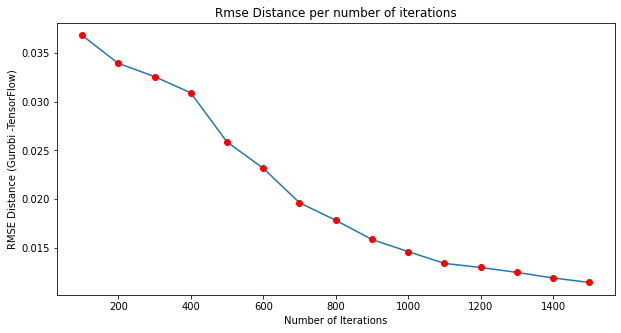

N_ITER        RMSE_DISTANCE
100           0.03679284942205645
200           0.03392051281766522
300           0.03257022394014289
400           0.030899850229606025
500           0.025865818951752505
600           0.02317137105233643
700           0.019637195234520597
800           0.01783967623798605
900           0.01586908316465489
1000          0.014627102998355321
1100          0.013418827161614496
1200          0.012999504588803827
1300          0.012497535343736687
1400          0.011924242319501668
1500          0.011465945035701572


In [5]:
path = "../../../log/Prove-5/Virginica/c1_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


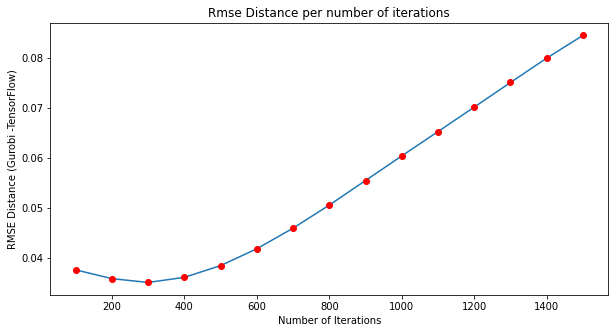

N_ITER        RMSE_DISTANCE
100           0.03763745370381301
200           0.03587953408217907
300           0.035120252317542296
400           0.03614041447601709
500           0.038489300662739215
600           0.04185291133768293
700           0.04596859447981345
800           0.05058861974991992
900           0.05549532218035384
1000          0.06041114769823442
1100          0.0652733969638943
1200          0.07016391082275245
1300          0.07508703325549188
1400          0.07995461725876442
1500          0.08450497942708714


In [6]:
path = "../../../log/Prove-5/Virginica/c1_sigma01_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

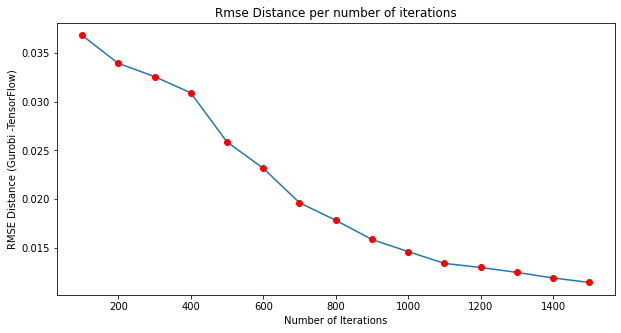

N_ITER        RMSE_DISTANCE
100           0.03679284942205645
200           0.03392051281766522
300           0.03257022394014289
400           0.030899850229606025
500           0.025865818951752505
600           0.02317137105233643
700           0.019637195234520597
800           0.01783967623798605
900           0.01586908316465489
1000          0.014627102998355321
1100          0.013418827161614496
1200          0.012999504588803827
1300          0.012497535343736687
1400          0.011924242319501668
1500          0.011465945035701572


In [7]:
path = "../../../log/Prove-5/Virginica/c1_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

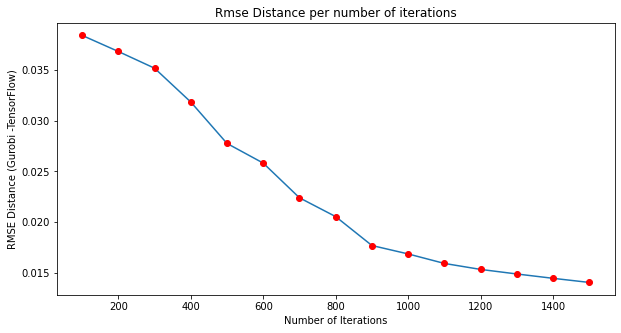

N_ITER        RMSE_DISTANCE
100           0.03844864299716726
200           0.03685638561452575
300           0.03520425562367181
400           0.031864069028645
500           0.027768444467901682
600           0.025825667317040637
700           0.022397424785771704
800           0.020537516445726232
900           0.017682178854602864
1000          0.016849985800979694
1100          0.015911319648599435
1200          0.015319807069780369
1300          0.014869484483291888
1400          0.01444030718199859
1500          0.014033224287910394


In [8]:
path = "../../../log/Prove-5/Virginica/c1_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


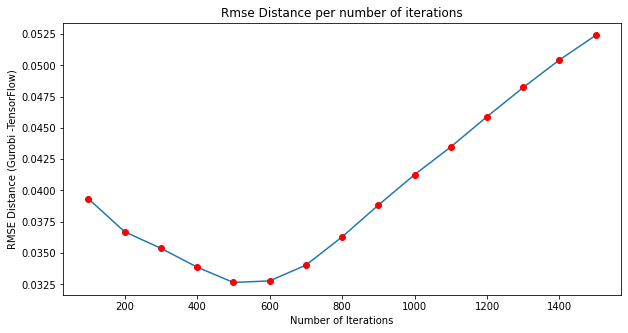

N_ITER        RMSE_DISTANCE
100           0.03933448049146425
200           0.0366985489252142
300           0.03538404928958191
400           0.03387646967739813
500           0.03265248649109692
600           0.03277618705734699
700           0.03403384156438635
800           0.03628754204630287
900           0.03882924799652933
1000          0.04126277311404732
1100          0.0434820144733181
1200          0.04589988181961631
1300          0.04823073473964792
1400          0.050437578565337364
1500          0.05239562732539462


In [9]:
path = "../../../log/Prove-5/Virginica/c1_sigma025_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

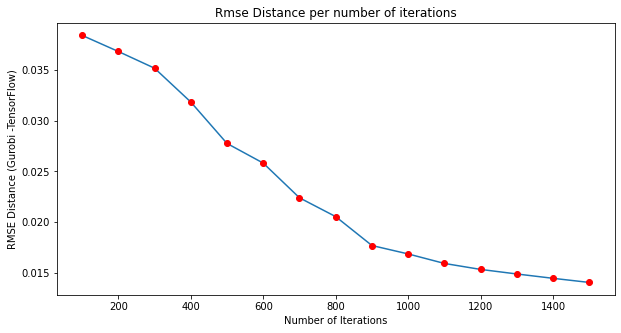

N_ITER        RMSE_DISTANCE
100           0.03844864299716726
200           0.03685638561452575
300           0.03520425562367181
400           0.031864069028645
500           0.027768444467901682
600           0.025825667317040637
700           0.022397424785771704
800           0.020537516445726232
900           0.017682178854602864
1000          0.016849985800979694
1100          0.015911319648599435
1200          0.015319807069780369
1300          0.014869484483291888
1400          0.01444030718199859
1500          0.014033224287910394


In [10]:
path = "../../../log/Prove-5/Virginica/c1_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

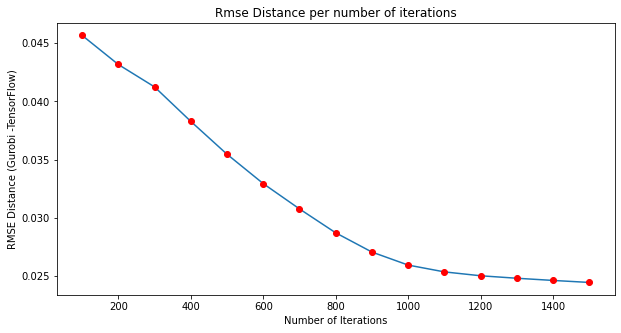

N_ITER        RMSE_DISTANCE
100           0.04567316745215184
200           0.043174404697742336
300           0.04124868416333288
400           0.03829276255780309
500           0.035470414156070634
600           0.03294873494834222
700           0.03077699197380363
800           0.02872324171618155
900           0.027072029479514897
1000          0.0259544498116885
1100          0.02536970650857938
1200          0.02503682162149729
1300          0.024823733060314095
1400          0.024636275923172638
1500          0.024463780635451914


In [11]:
path = "../../../log/Prove-5/Virginica/c1_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


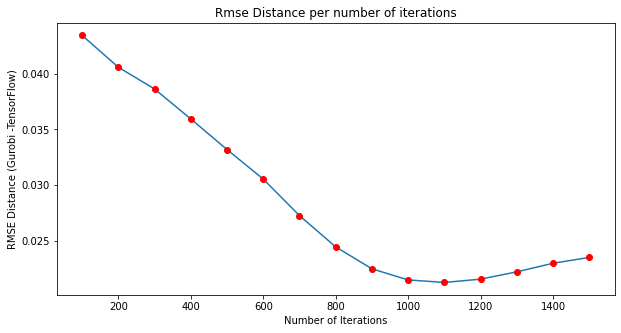

N_ITER        RMSE_DISTANCE
100           0.04346185891128487
200           0.0406005914773217
300           0.038641295777409844
400           0.03595193031419586
500           0.033200048570418084
600           0.030543905063348458
700           0.027264231843665603
800           0.024448651206292513
900           0.022478130707327546
1000          0.021478725550708056
1100          0.021253154456634952
1200          0.02154915277159629
1300          0.022209002092079363
1400          0.022978688003829194
1500          0.02350401563605248


In [12]:
path = "../../../log/Prove-5/Virginica/c1_sigma05_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

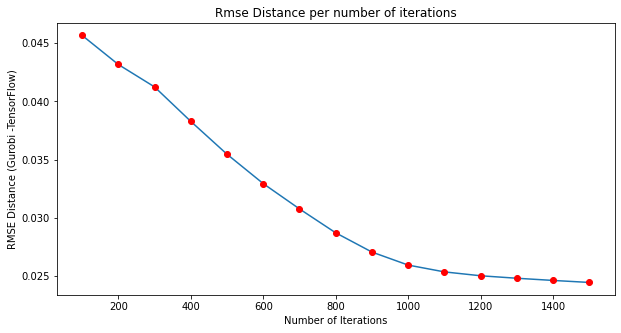

N_ITER        RMSE_DISTANCE
100           0.04567316745215184
200           0.043174404697742336
300           0.04124868416333288
400           0.03829276255780309
500           0.035470414156070634
600           0.03294873494834222
700           0.03077699197380363
800           0.02872324171618155
900           0.027072029479514897
1000          0.0259544498116885
1100          0.02536970650857938
1200          0.02503682162149729
1300          0.024823733060314095
1400          0.024636275923172638
1500          0.024463780635451914


In [13]:
path = "../../../log/Prove-5/Virginica/c1_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

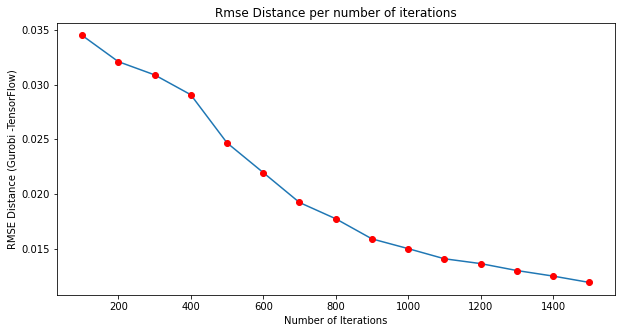

N_ITER        RMSE_DISTANCE
100           0.03449979552405749
200           0.03209712008806857
300           0.03088931171552531
400           0.029071965781374023
500           0.02467153966869263
600           0.021952938374537708
700           0.019218446136129125
800           0.01773179440906186
900           0.015891130855165025
1000          0.01499907982647594
1100          0.01407235040408034
1200          0.01363111054570645
1300          0.01299661595391017
1400          0.012488791857755307
1500          0.011907087206114999


In [14]:
path = "../../../log/Prove-5/Virginica/c75_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


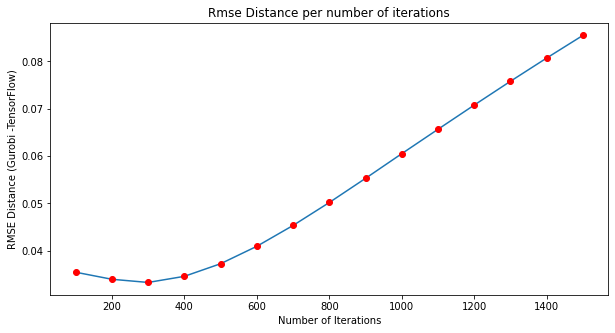

N_ITER        RMSE_DISTANCE
100           0.03543384271197598
200           0.033939557780601655
300           0.03327103005245089
400           0.03456532494306271
500           0.03723376771542748
600           0.04091902602816472
700           0.045326727503528355
800           0.050179361797369273
900           0.055287364921285914
1000          0.06050765696853409
1100          0.065666918637376
1200          0.07078675565674837
1300          0.07582175316129774
1400          0.0807357900123266
1500          0.08552635403372023


In [15]:
path = "../../../log/Prove-5/Virginica/c75_sigma01_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

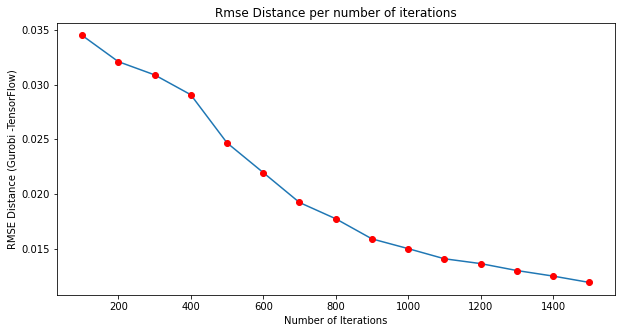

N_ITER        RMSE_DISTANCE
100           0.03449979552405749
200           0.03209712008806857
300           0.03088931171552531
400           0.029071965781374023
500           0.02467153966869263
600           0.021952938374537708
700           0.019218446136129125
800           0.01773179440906186
900           0.015891130855165025
1000          0.01499907982647594
1100          0.01407235040408034
1200          0.01363111054570645
1300          0.01299661595391017
1400          0.012488791857755307
1500          0.011907087206114999


In [16]:
path = "../../../log/Prove-5/Virginica/c75_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

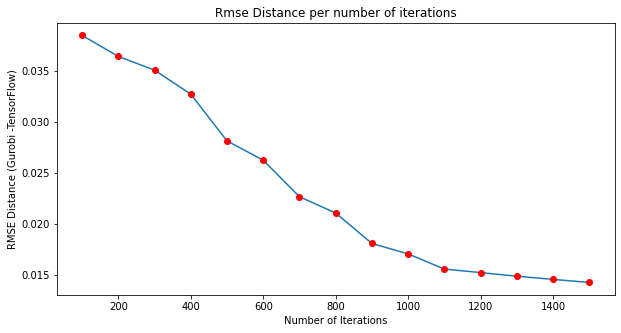

N_ITER        RMSE_DISTANCE
100           0.03845603876501297
200           0.03639636935451609
300           0.035051232238389816
400           0.03270468519996168
500           0.028129599455632613
600           0.02624085648234674
700           0.022666544171873818
800           0.02107405350528786
900           0.018094939689224154
1000          0.017073138971363692
1100          0.01559103964348989
1200          0.01524680257923151
1300          0.014893661018545463
1400          0.014581270823835098
1500          0.014283323671466187


In [17]:
path = "../../../log/Prove-5/Virginica/c75_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


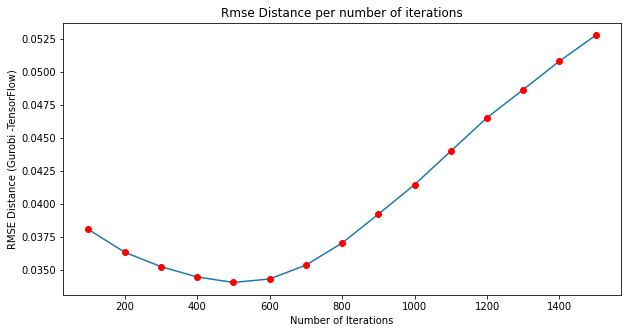

N_ITER        RMSE_DISTANCE
100           0.0380645933378857
200           0.03633749780332799
300           0.03524864148959944
400           0.03446237891342903
500           0.03404611685924237
600           0.0343084825579943
700           0.0353565578162003
800           0.03703260729773948
900           0.03922191289692059
1000          0.04146095316638176
1100          0.04400662925835267
1200          0.04654114222852204
1300          0.04867585142345501
1400          0.050835908012575856
1500          0.05278951087040985


In [18]:
path = "../../../log/Prove-5/Virginica/c75_sigma025_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

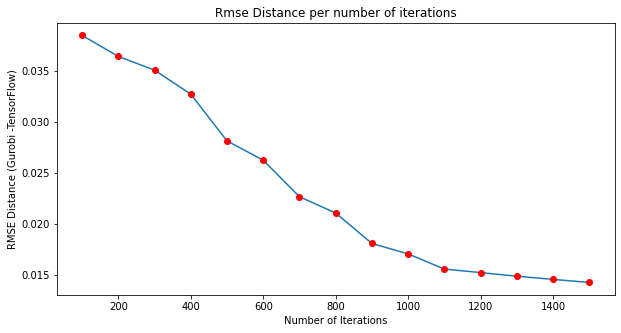

N_ITER        RMSE_DISTANCE
100           0.03845603876501297
200           0.03639636935451609
300           0.035051232238389816
400           0.03270468519996168
500           0.028129599455632613
600           0.02624085648234674
700           0.022666544171873818
800           0.02107405350528786
900           0.018094939689224154
1000          0.017073138971363692
1100          0.01559103964348989
1200          0.01524680257923151
1300          0.014893661018545463
1400          0.014581270823835098
1500          0.014283323671466187


In [19]:
path = "../../../log/Prove-5/Virginica/c75_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

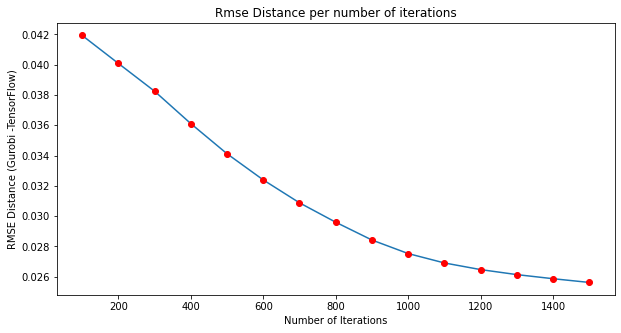

N_ITER        RMSE_DISTANCE
100           0.04193418850009309
200           0.04008519051836658
300           0.03824837927372983
400           0.03610994971137712
500           0.03411870556351273
600           0.032390324628785806
700           0.030877384183737526
800           0.02959643335738024
900           0.02842005235770906
1000          0.027526264058029708
1100          0.026906030765084233
1200          0.026466873239331
1300          0.026135889391125645
1400          0.025864878571721282
1500          0.025618861103760222


In [20]:
path = "../../../log/Prove-5/Virginica/c75_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


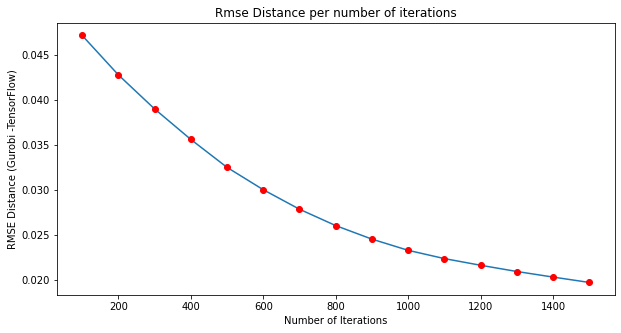

N_ITER        RMSE_DISTANCE
100           0.04717689742137586
200           0.04278518001025857
300           0.03899409733569675
400           0.03559979156825316
500           0.03248835626414471
600           0.0299993341424562
700           0.027828182816217916
800           0.02600544690179651
900           0.024498522300827684
1000          0.023251918590392096
1100          0.02233229824142512
1200          0.02158967327277006
1300          0.020896346023978433
1400          0.020275413432453336
1500          0.019678444448380926


In [21]:
path = "../../../log/Prove-5/Setosa/c75_sigma05_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

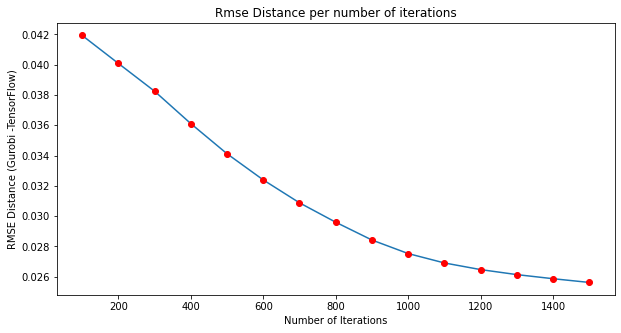

N_ITER        RMSE_DISTANCE
100           0.04193418850009309
200           0.04008519051836658
300           0.03824837927372983
400           0.03610994971137712
500           0.03411870556351273
600           0.032390324628785806
700           0.030877384183737526
800           0.02959643335738024
900           0.02842005235770906
1000          0.027526264058029708
1100          0.026906030765084233
1200          0.026466873239331
1300          0.026135889391125645
1400          0.025864878571721282
1500          0.025618861103760222


In [22]:
path = "../../../log/Prove-5/Virginica/c75_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

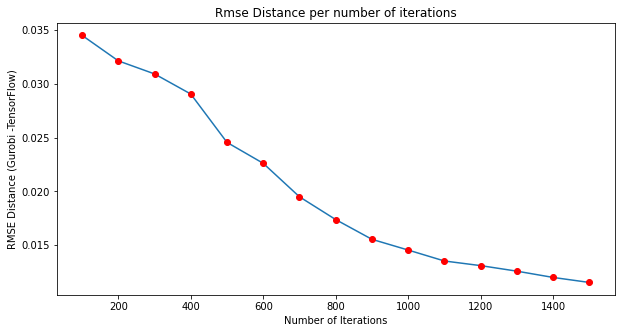

N_ITER        RMSE_DISTANCE
100           0.03451257473921245
200           0.032141425353005945
300           0.030926694663259077
400           0.02905619533721976
500           0.024557649535616115
600           0.022610824226894106
700           0.019498503802416616
800           0.0173796319952697
900           0.015543688027483423
1000          0.014545311512317737
1100          0.013527802886143943
1200          0.01309702215508866
1300          0.01258232568124988
1400          0.011998262515308444
1500          0.011532427014089098


In [23]:
path = "../../../log/Prove-5/Virginica/c200_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


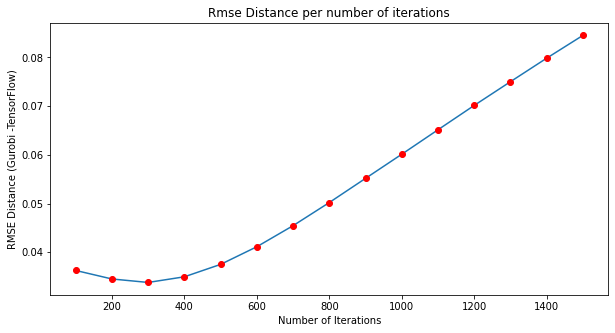

N_ITER        RMSE_DISTANCE
100           0.03625588167216957
200           0.03450562987452377
300           0.03379371479374498
400           0.03495382419414777
500           0.0375021492174461
600           0.041126699655065234
700           0.04545226412747281
800           0.05020292429831333
900           0.055163029601093726
1000          0.0601195867931542
1100          0.06514388526583552
1200          0.0701453991186848
1300          0.0750161890912477
1400          0.07984281631291602
1500          0.08452370891879774


In [24]:
path = "../../../log/Prove-5/Virginica/c200_sigma01_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

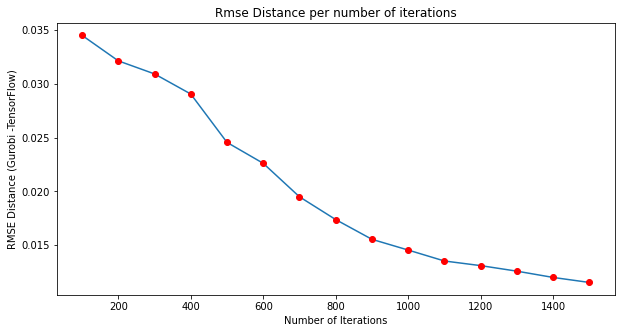

N_ITER        RMSE_DISTANCE
100           0.03451257473921245
200           0.032141425353005945
300           0.030926694663259077
400           0.02905619533721976
500           0.024557649535616115
600           0.022610824226894106
700           0.019498503802416616
800           0.0173796319952697
900           0.015543688027483423
1000          0.014545311512317737
1100          0.013527802886143943
1200          0.01309702215508866
1300          0.01258232568124988
1400          0.011998262515308444
1500          0.011532427014089098


In [25]:
path = "../../../log/Prove-5/Virginica/c200_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

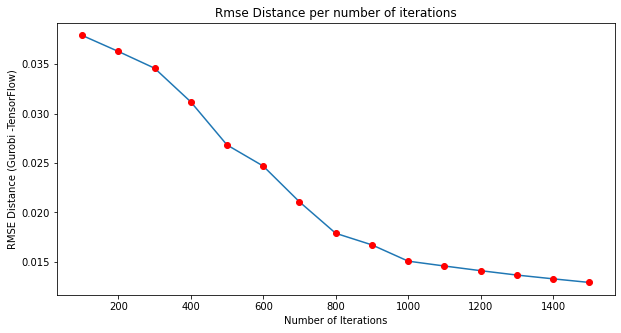

N_ITER        RMSE_DISTANCE
100           0.03791014423798566
200           0.03628480652813303
300           0.034590096074677334
400           0.031186552372695447
500           0.026829547529417085
600           0.024691995406264957
700           0.021074801937881263
800           0.0178948702600097
900           0.016723705827653194
1000          0.015078441517796044
1100          0.01458758573693727
1200          0.014114569705140993
1300          0.013672318864467101
1400          0.013289798982846159
1500          0.012925165098453517


In [26]:
path = "../../../log/Prove-5/Virginica/c200_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


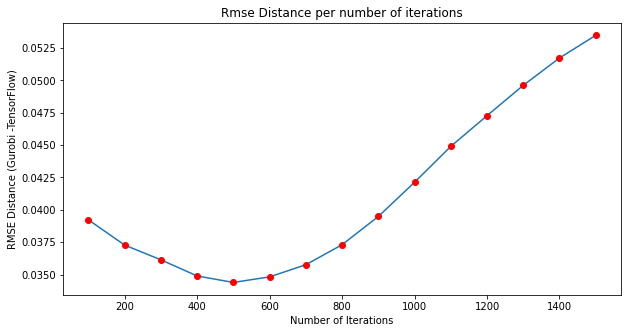

N_ITER        RMSE_DISTANCE
100           0.03922357747819882
200           0.037273683465885186
300           0.03613622580817589
400           0.034889699475943725
500           0.03438890652276157
600           0.034819200467995325
700           0.03575825513054907
800           0.03730184583905342
900           0.03948474454290447
1000          0.042124905967087685
1100          0.044896145776551134
1200          0.047269563658517914
1300          0.049612206858748724
1400          0.05172664256064435
1500          0.05347564368374191


In [27]:
path = "../../../log/Prove-5/Virginica/c200_sigma025_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

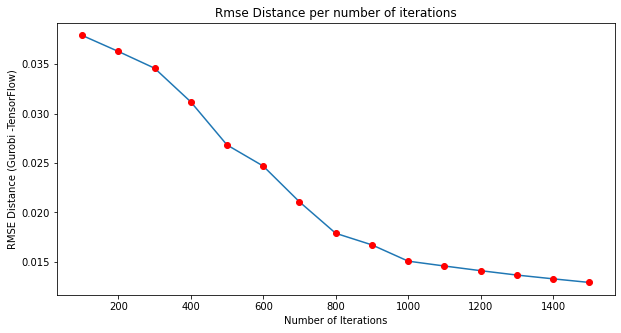

N_ITER        RMSE_DISTANCE
100           0.03791014423798566
200           0.03628480652813303
300           0.034590096074677334
400           0.031186552372695447
500           0.026829547529417085
600           0.024691995406264957
700           0.021074801937881263
800           0.0178948702600097
900           0.016723705827653194
1000          0.015078441517796044
1100          0.01458758573693727
1200          0.014114569705140993
1300          0.013672318864467101
1400          0.013289798982846159
1500          0.012925165098453517


In [28]:
path = "../../../log/Prove-5/Virginica/c200_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

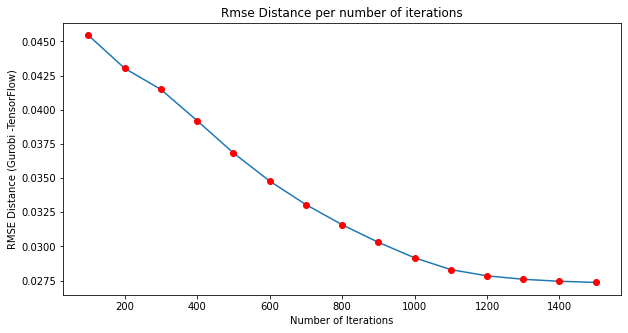

N_ITER        RMSE_DISTANCE
100           0.045436580388792495
200           0.043023611393475596
300           0.04148153974206336
400           0.03919569687544671
500           0.0368395672256975
600           0.03478146075579214
700           0.03306182000460304
800           0.031588922117818496
900           0.030301612646474886
1000          0.02916741097684487
1100          0.028304225122143152
1200          0.02784732319527593
1300          0.027597138337646036
1400          0.027450130128725075
1500          0.02736467241419825


In [29]:
path = "../../../log/Prove-5/Virginica/c200_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


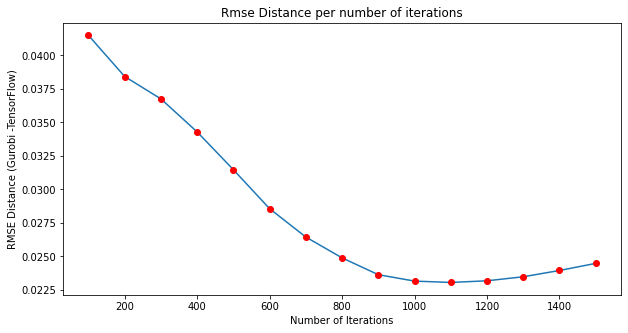

N_ITER        RMSE_DISTANCE
100           0.04149903644156591
200           0.03842820628111719
300           0.036758562839200204
400           0.03429291177644095
500           0.03147404533284066
600           0.02856468034753146
700           0.026447168817347214
800           0.024892660137089687
900           0.02363827663133357
1000          0.023159050716048575
1100          0.023058901814969078
1200          0.023182129921520214
1300          0.023482947229028866
1400          0.02395120989943251
1500          0.024481938889685063


In [30]:
path = "../../../log/Prove-5/Virginica/c200_sigma05_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

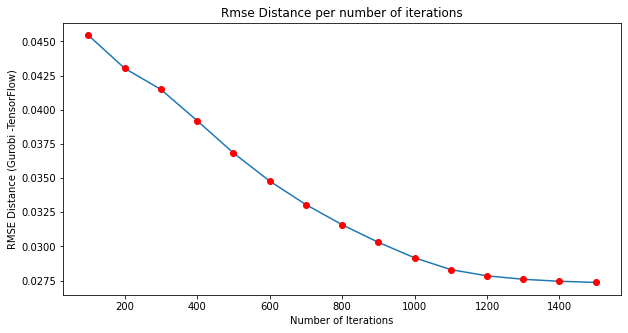

N_ITER        RMSE_DISTANCE
100           0.045436580388792495
200           0.043023611393475596
300           0.04148153974206336
400           0.03919569687544671
500           0.0368395672256975
600           0.03478146075579214
700           0.03306182000460304
800           0.031588922117818496
900           0.030301612646474886
1000          0.02916741097684487
1100          0.028304225122143152
1200          0.02784732319527593
1300          0.027597138337646036
1400          0.027450130128725075
1500          0.02736467241419825


In [31]:
path = "../../../log/Prove-5/Virginica/c200_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)